In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [46]:
import warnings
warnings.filterwarnings('ignore')


In [47]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
df.shape

(50, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [51]:
data=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [53]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


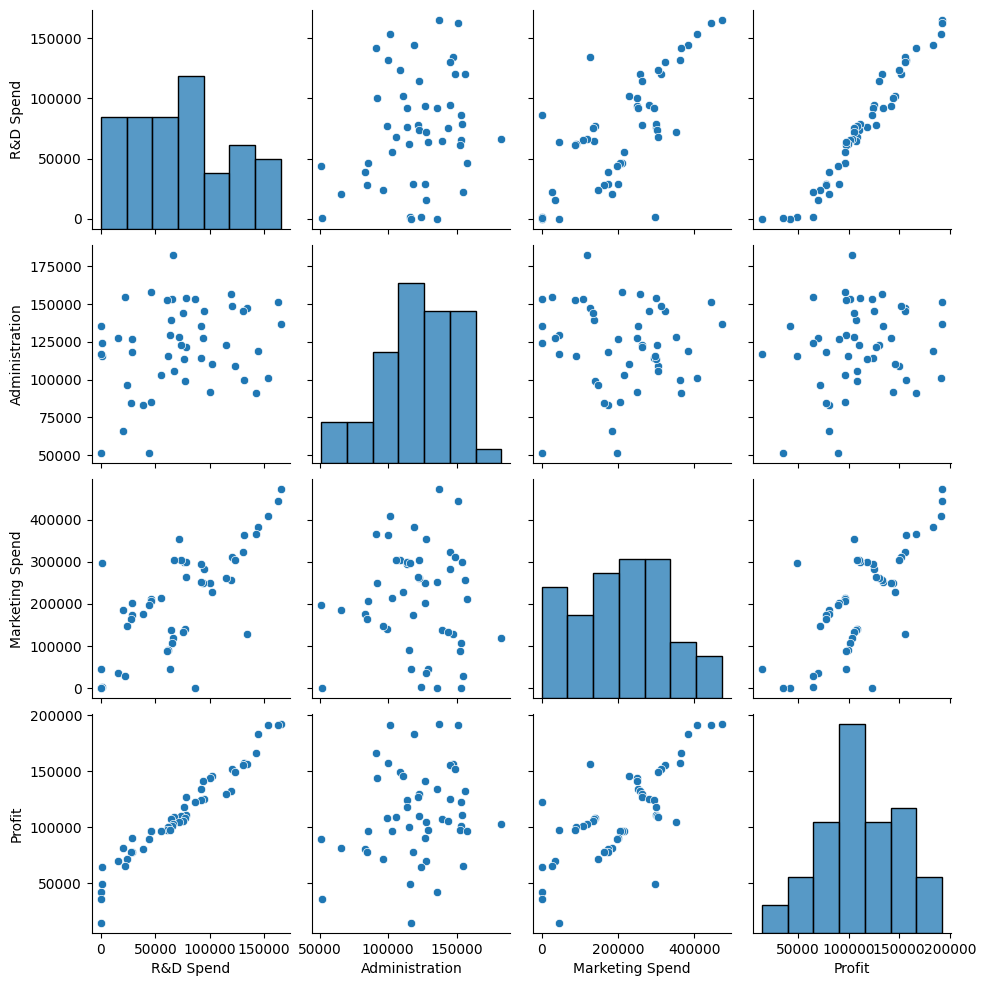

In [54]:
sns.pairplot(df)

In [55]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()
model.rsquared

0.9507459940683246

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        08:07:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [58]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

**Simple Linear Regression Model**

In [59]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data).fit()
mlr_am.tvalues
mlr_am.pvalues

Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64

In [60]:
ml_ADMS=smf.ols('Profit~ADMS',data = data).fit()
#t and p-Values
print(ml_ADMS.tvalues, '\n', ml_ADMS.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [61]:
ml_MKTS=smf.ols('Profit~MKTS',data = data).fit()
#t and p-Values
print(ml_MKTS.tvalues, '\n', ml_MKTS.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [62]:
ml_ADMS.MKTS=smf.ols('Profit~MKTS+ADMS',data=data).fit()
print(ml_ADMS.MKTS.tvalues, '\n', ml_ADMS.MKTS.pvalues)

Intercept    1.142741
MKTS         8.281039
ADMS         2.467779
dtype: float64 
 Intercept    2.589341e-01
MKTS         9.727245e-11
ADMS         1.729198e-02
dtype: float64


In [63]:
# Calculation VIF#
rsq_RDS=smf.ols('RDS~ADMS+MKTS+Profit',data=data).fit().rsquared
vif_RDS=1/(1-rsq_RDS)
vif_RDS

19.563000566996017

In [64]:
rsq_ADMS=smf.ols('ADMS~RDS+MKTS+Profit',data=data).fit().rsquared
vif_ADMS=1/(1-rsq_ADMS)
vif_ADMS

1.1821455725780203

In [65]:
rsq_MKTS=smf.ols('MKTS~RDS+ADMS+Profit',data=data).fit().rsquared
vif_MKTS=1/(1-rsq_MKTS)
vif_MKTS

2.4653316722258243

In [66]:
rsq_Profit=smf.ols('Profit~RDS+ADMS+MKTS',data=data).fit().rsquared
vif_Profit=1/(1-rsq_Profit)
vif_Profit

20.30291711474573

In [67]:
# Storing vif values in a data frame
d1 = {'Variables': ['RDS', 'ADMS', 'MKTS'], 'VIF': [vif_ADMS, vif_MKTS, vif_RDS]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,1.182146
1,ADMS,2.465332
2,MKTS,19.563001


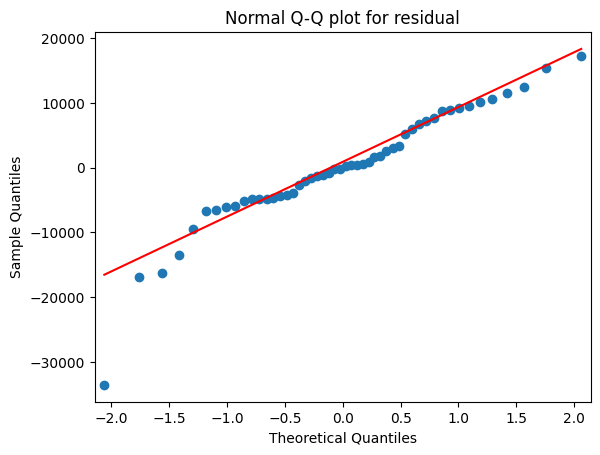

In [68]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot for residual')
plt.show()

In [69]:
#Residual Plot for Homoscedasticity#
def get_standardized_vals(vals):
  return(vals-vals.mean())/vals.std()

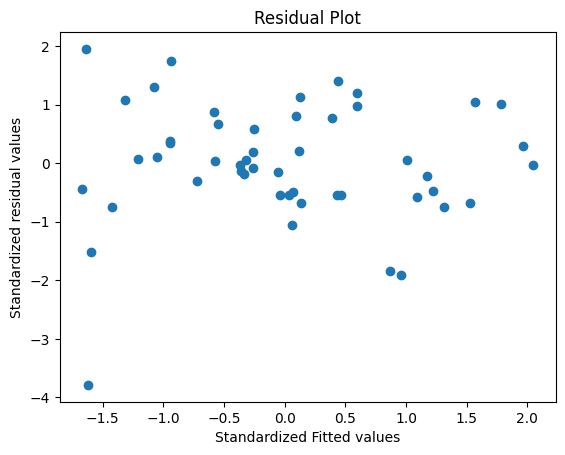

In [70]:
plt.scatter(get_standardized_vals(model.fittedvalues),
            get_standardized_vals(model.resid.values))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


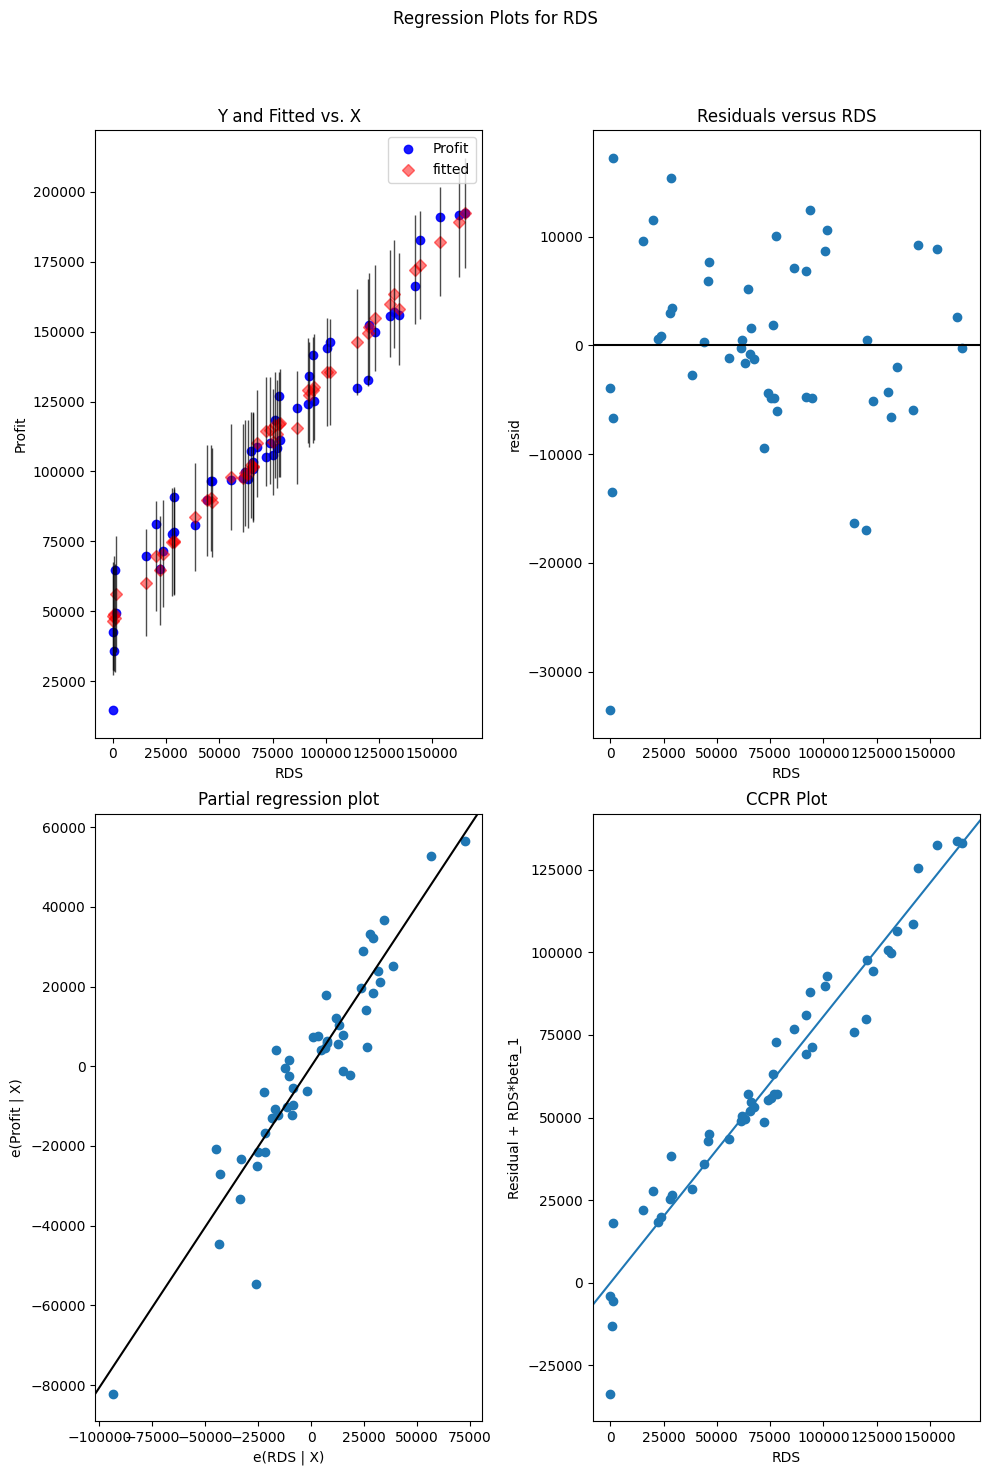

In [71]:
#Residual Vs Regressors#
fig=plt.figure(figsize=(10,15))
fig=sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()


eval_env: 1


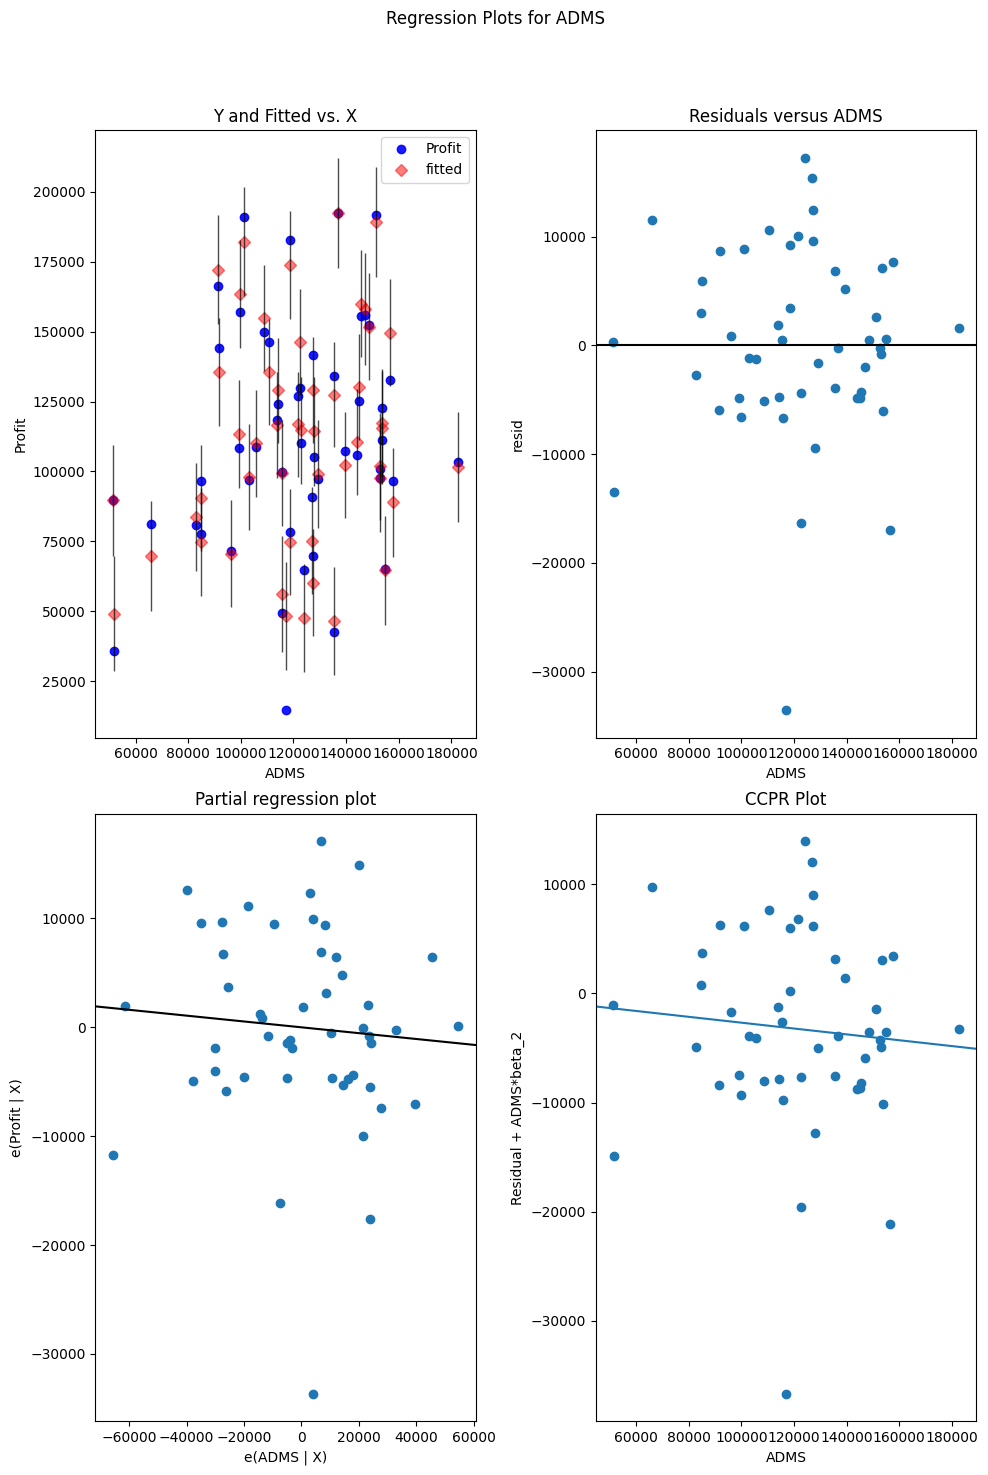

In [72]:
fig=plt.figure(figsize=(10,15))
fig=sm.graphics.plot_regress_exog(model,"ADMS",fig=fig)
plt.show()

eval_env: 1


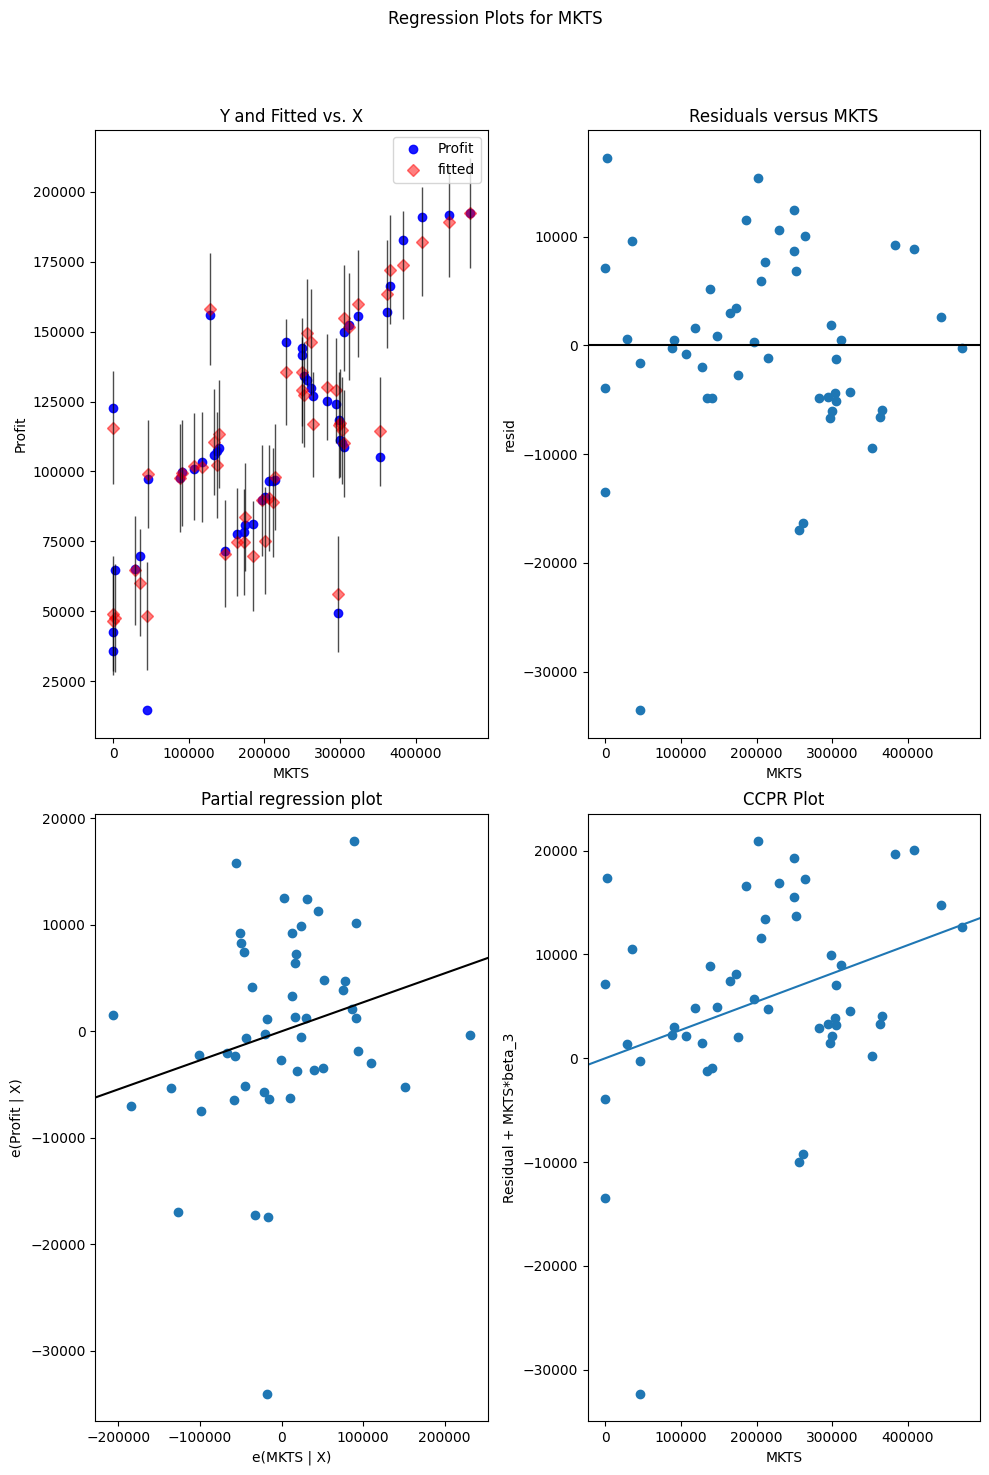

In [73]:
fig=plt.figure(figsize=(10,15))
fig=sm.graphics.plot_regress_exog(model,"MKTS",fig=fig)
plt.show()

In [74]:
# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

In [75]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

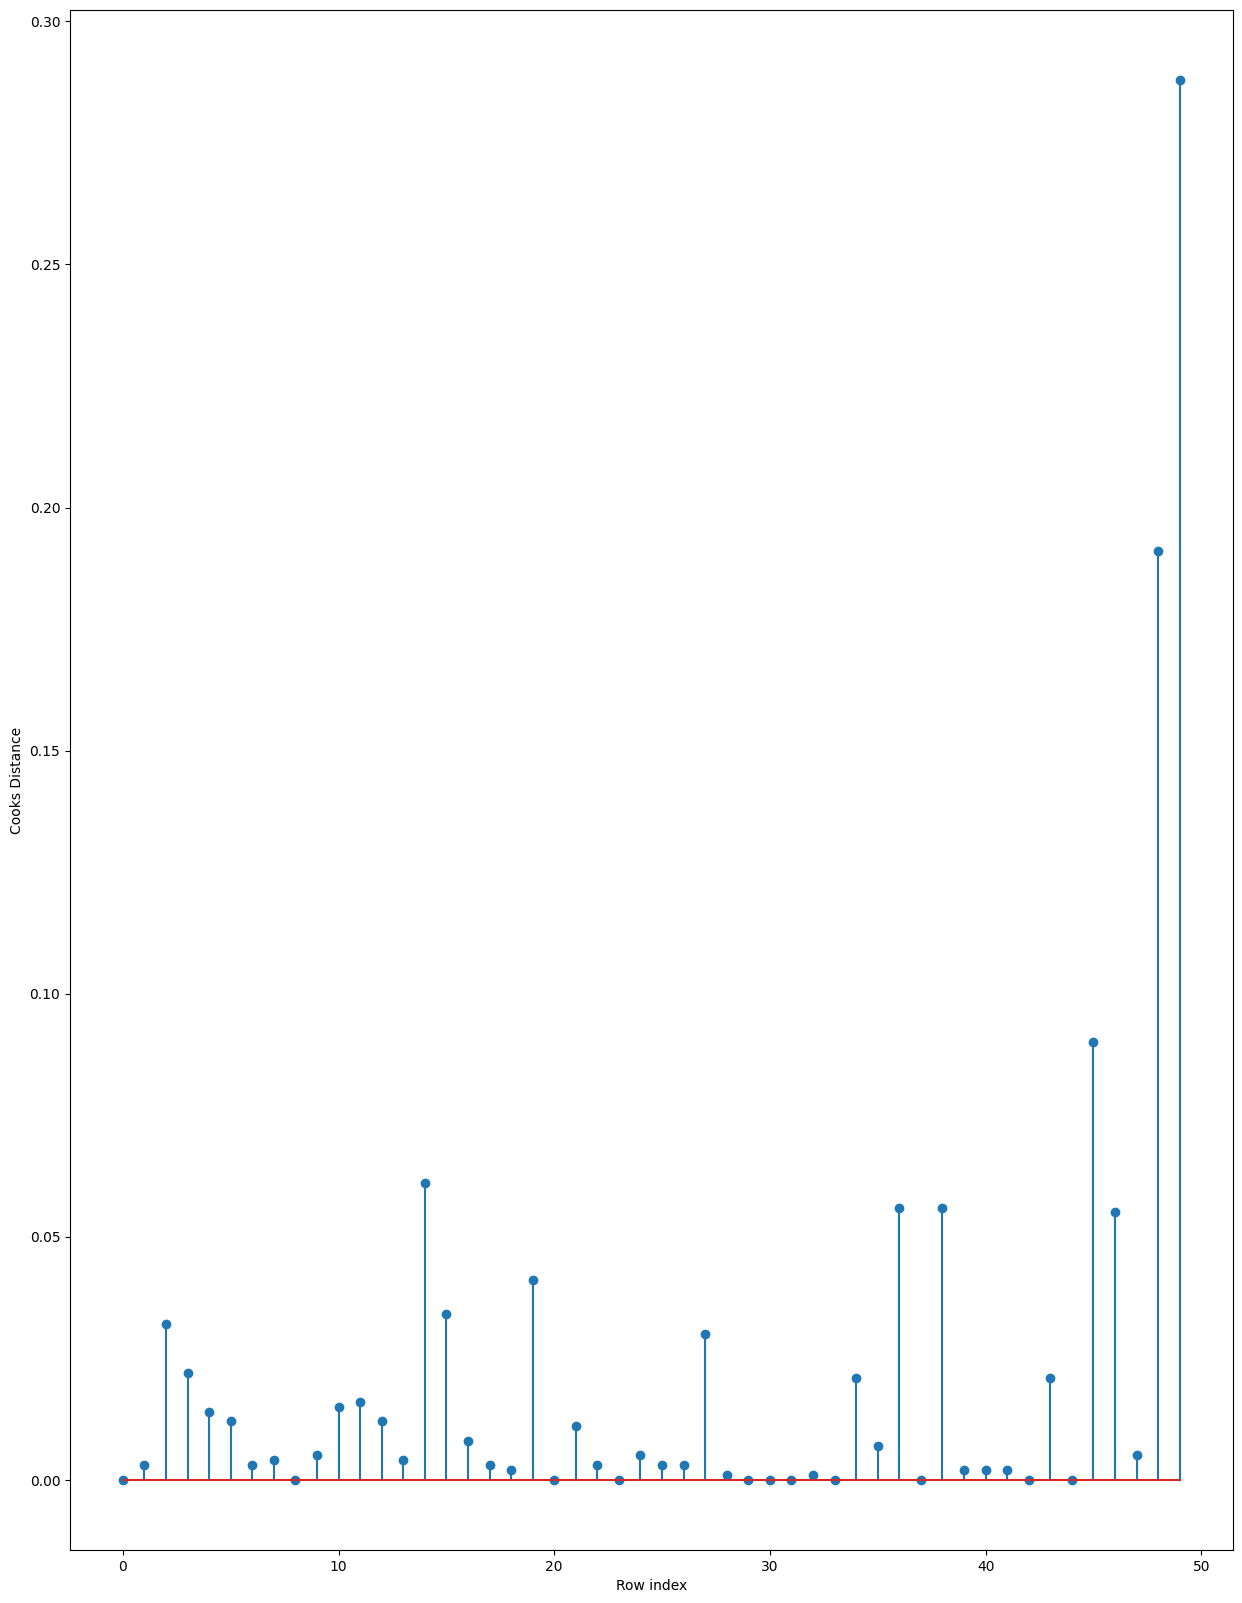

In [76]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(15,20))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

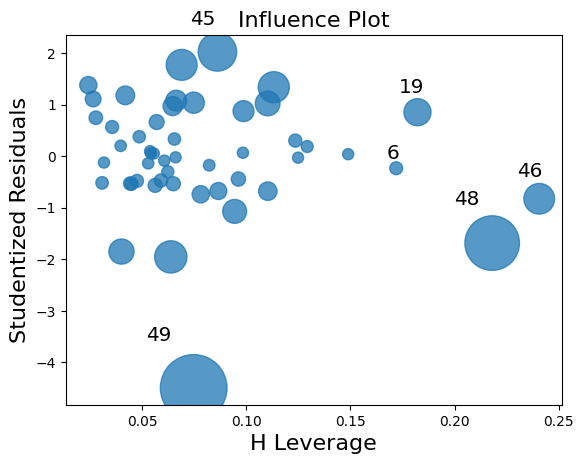

In [78]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [79]:
k=2
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.18

In [80]:
# From the above plot, it is evident that data point 46 and 48 are the influencers
data[data.index.isin([46, 48])]

,RDS,ADMS,MKTS,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41


In [81]:
#See the differences in HP and other variable values
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [82]:
# Improving the model
#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [83]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[46,48]],axis=0).reset_index()
data1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [84]:
data1=data1.drop(['index'],axis=1)
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [96]:
# Build a model
#Exclude variable "MKTS" and generate R-Squared and AIC values
data1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
final_ml_rds= smf.ols('Profit~RDS+ADMS',data = data1).fit()
(final_ml_rds.rsquared,final_ml_rds.aic,final_ml_rds.bic)

(0.9478129385009173, 1059.6636934567293, 1065.3997624730139)

In [92]:
#Exclude variable "RDS" and generate R-Squared and AIC values
final_ml_mkts= smf.ols('Profit~MKTS+ADMS',data = data1).fit()
(final_ml_mkts.rsquared,final_ml_mkts.aic,final_ml_mkts.bic)

(0.6097229746770664, 1160.2648038638672, 1166.0008728801517)

In [93]:
# Predicting for new data
#New data for prediction
new_data=pd.DataFrame({'RDS':40,"ADMS":95,"MKTS":102,"WT":35},index=[1])

In [94]:
final_ml_rds.predict(new_data)

1    54916.070781
dtype: float64

In [101]:
data_new=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
final_ml_rds.predict(data_new.iloc[0:5,])

0    190182.180514
1    187042.700174
2    181811.052822
3    173063.604832
4    172556.566886
dtype: float64

In [102]:
pred_y = final_ml_rds.predict(data_new)
pred_y

0     190182.180514
1     187042.700174
2     181811.052822
3     173063.604832
4     172556.566886
5     163290.343299
6     163140.161084
7     159506.552582
8     150927.069214
9     155456.338405
10    136886.736437
11    136813.244176
12    129060.848433
13    127014.294107
14    149995.546004
15    147121.351290
16    115699.010578
17    128803.810974
18    127934.425602
19    121255.051066
20    114591.997463
21    114318.302643
22    112171.736192
23    107503.307314
24    116046.189233
25    103239.549657
26    112190.445185
27    110275.641867
28    102151.443140
29    103336.284260
30    102204.716777
31     99500.888718
32    102704.489740
33     97267.376385
34     86554.312813
35     90049.008683
36     72864.764709
37     90162.344647
38     68831.974816
39     83730.933594
40     73393.846339
41     74444.324569
42     70170.280405
43     61503.709214
44     65802.430738
45     49169.392917
46     49882.972274
47     47709.612512
48     52611.781096
49     48687.013622
